#### Import required modules

In [32]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Functions

In [124]:
#Accepts the name of data frame and 1 column name, returns the number of unique values in that column
#if column does not exist, returns -1
def get_len(df,column):
    if column not in df.columns:
        return -1
    return len(df[column].unique())
#--------------------------------------------------------------------------
def get_unique_count(df,column):
    for col in column:
        if col not in df.columns:
            return {}
    d = {}
    for col in column:
        val = df_bank[col].unique()
        count = len(df_bank[col].unique())
        d.update({col:{'count':count,'Unique_values':val}})
    return d
#-------------------------------------------------------------------------
#Accepts the name of data frame and a list of column names, returns the unique values for all columns
#if column does not exist, returns {}
##### Accepted function calls
##### get_unique(df_bank,['age'])
##### get_unique(df_bank,['age','marital'])
##### get_unique(df_bank,df_bank.columns)
##### l = ['poutcome','previous','pdays']
##### get_unique(df_bank,l)

def get_unique(df,column):
    for col in column:
        if col not in df.columns:
            return {}
    d = {}
    for col in column:
        d[col] = df_bank[col].unique()
    return d
#------------------------------------------------------------------------
#takes 2 categorical columns from single dataframe(independent and dependent) 
#1. computes cross tabulation for both
#2. calculates the percentage of independent variable, leading to different values of dependent variable 
'''
df: dataframe
dep: dependent variable column from df
indep: independent variable column from df
x_ticks: list of labels/categories
x_label: Label for x axis
'''
def plot_percentage(df, dep, indep,x_ticks,x_label):
    
    df_new = pd.crosstab(df[indep], df[dep])

    #calculate % of yes/no within each bin
    df_new['% signed up'] = round((df_new['yes']/(df_new['no'] +df_new['yes']))*100,2) 
    df_new['% passed up'] = round((df_new['no']/(df_new['no'] +df_new['yes']))*100,2) 
    
    df_new = df_new.reset_index()
    print(df_new)
    x =  x_ticks
    
    plt.bar(x, df_new['% signed up'], color='#f9bc86')
    plt.bar(x, df_new['% passed up'], bottom=df_new['% signed up'], color='#b5ffb9')
    
    plt.xlabel(x_label)
    plt.legend('YN');
    plt.show()

#### Define common variables

In [34]:
#Location of plots generated by this project
plot_images = "plots\\"

#### Load data from csv file

In [35]:
df_bank = pd.read_csv('Data\\bank-full.csv', delimiter=';')

In [36]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [37]:
df_bank.shape

(45211, 17)

* There are 17 columns and 45211 rows

In [38]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


* There are **NO** null values present in any of the columns! Needs further evaluation.
* All columns adhere to their relevant datatypes

In [39]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


* Age is in normal range(18-95) so are the days(1-31)

* Customers have balance ranging from -ve to +ve values

* Duration(last call duration in seconds)

* Campaign(number of contacts performed) : A customer has been contacted average 2 times during the campaign.

* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

* Most people seem to have not been contacted before (Find count)

* previous: number of contacts performed before this campaign and for this client (numeric). Quantiles are consistent with pdays

Q Comparision of difference between behavious of customers with +ve and -ve balance?

Q Do higher call durations result in much more signups?

Q Does increase in number of contacts have any impact on their decision (maybe once we remove the obvious blocks such as previous loans and commitments)?


#### Let us look at the unknowns and their percentage within the column.

In [40]:
#define a list of needed columns['col1'[,col2..]] or all columns using df.columns
column_list = df_bank.columns

#find count of unique elements in a list of columns using get_len function
x = {col:get_len(df_bank,col) for col in column_list}

#Sort in acsending order
x = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
print(x)

{'default': 2, 'housing': 2, 'loan': 2, 'y': 2, 'marital': 3, 'contact': 3, 'education': 4, 'poutcome': 4, 'job': 12, 'month': 12, 'day': 31, 'previous': 41, 'campaign': 48, 'age': 77, 'pdays': 559, 'duration': 1573, 'balance': 7168}


### Majority of columns are categorical with few unique entries.

In [41]:
#These differentiating lists will be used to perform analysis on similar types of column
continous=['age','previous','campaign','pdays','duration','balance']
categories=['y','loan','housing','default','contact','marital','poutcome','education']
large_cat=['job','month','day']
all_cat=['y','loan','housing','default','contact','marital','poutcome','education','job','month','day']

#### View the actual unique values in each column using get_unique_count()

In [42]:
get_unique(df_bank,all_cat)

{'y': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'housing': array(['yes', 'no'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'contact': array(['unknown', 'cellular', 'telephone'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'poutcome': array(['unknown', 'failure', 'other', 'success'], dtype=object),
 'education': array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object),
 'job': array(['management', 'technician', 'entrepreneur', 'blue-collar',
        'unknown', 'retired', 'admin.', 'services', 'self-employed',
        'unemployed', 'housemaid', 'student'], dtype=object),
 'month': array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
        'mar', 'apr', 'sep'], dtype=object),
 'day': array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
        29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
       dtype=int64)}

* This highlights that we do have unknowns in the data
1. contact: unknown 
2. poutcome: unknown, other
3. education: unknown
4. job: unknown

In [43]:
#function call takes a dataframe and list of columns
get_unique(df_bank,['age','previous','campaign','balance'])

{'age': array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
        25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
        27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
        69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
        95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64),
 'previous': array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
          9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
         38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
         35,  41], dtype=int64),
 'campaign': array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
        32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
        20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
       dtype=int64),
 'balance': array([ 2143,    29,     2, ...,  8205, 14204, 16353], dtype=int64)}

* There is an obvious outlier in **previous: 275**  Could be an data entry error

### Distribution of all continous features
#### 1. Age distribution analysis

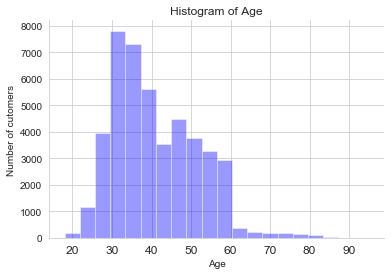

In [44]:
sns.set_style("whitegrid")
# seaborn histogram
sns.distplot(df_bank['age'], hist=True, kde=False,color = 'blue',bins = 20)

# Add labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Number of cutomers')
plt.xticks(fontsize=12)
sns.despine(right=True)

Most of the age data lies between age group of 25 - 60

Below box plots show the same

Q. Remove the data for older customers: find the percentage of people who opted for the term deposit

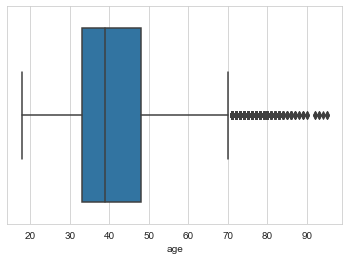

In [45]:
sns.boxplot(df_bank['age'])

In [46]:
#Divide age in multiple groups, add that column in dataframe
df_bank['age_cat'] = pd.cut(df_bank.age,bins=[17,25,40,60,95],labels=['Young','youngAdult','Adult','Elderly'])
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Adult
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Adult
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,youngAdult
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Adult
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,youngAdult


y     age_cat     no   yes  % signed up  % passed up
0       Young   1016   320        23.95        76.05
1  youngAdult  20744  2637        11.28        88.72
2       Adult  17476  1830         9.48        90.52
3     Elderly    686   502        42.26        57.74


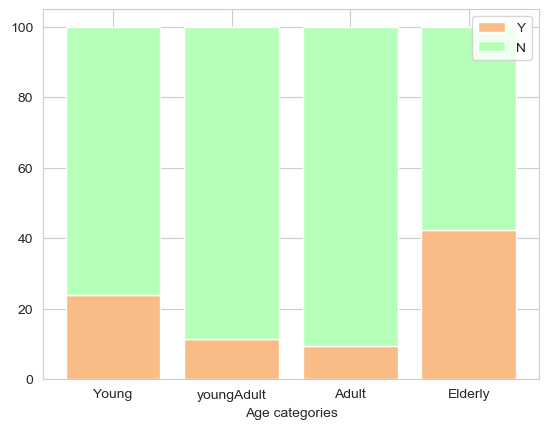

In [125]:
plot_percentage(df_bank, 'y', 'age_cat',['Young','youngAdult','Adult','Elderly'],'Age categories')

### Looks like elderly people are much more likely to sign up for the deposit than any other age group.
### Their significant number warrants them in the data despite being outlier

#### 2. Balance distribution analysis

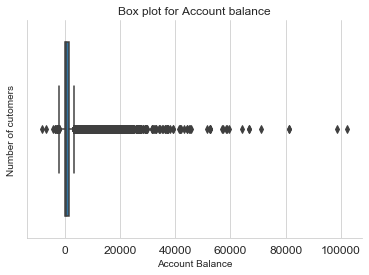

In [48]:
sns.set_style("whitegrid")

# seaborn boxplot
sns.boxplot(df_bank['balance'])

# Add labels
plt.title('Box plot for Account balance')
plt.xlabel('Account Balance')
plt.ylabel('Number of cutomers')
plt.xticks(fontsize=12)
sns.despine(right=True)

In [49]:
df_bank['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [50]:
#Divide balance into bins of size 50
df_bank['balance_cat'] = pd.cut(df_bank['balance'], bins=50)

In [51]:
#Calculate the number of people in different age group who did/did not sign up for the term deposit
df_bal = pd.crosstab(df_bank['balance_cat'], df_bank.y)
df_bal

y,no,yes
balance_cat,,
"(-8129.146, -5816.08]",2,0
"(-5816.08, -3613.16]",1,0
"(-3613.16, -1410.24]",57,2
"(-1410.24, 792.68]",25551,2716
"(792.68, 2995.6]",9607,1651
"(2995.6, 5198.52]",2447,507
"(5198.52, 7401.44]",1004,180
"(7401.44, 9604.36]",500,93
"(9604.36, 11807.28]",252,51


### Based on this dictribution, we need to regroup the bins
1. negative : all negative balances
2. low: upto 8000
3. medium: upto 16000
4. high: upto 24000
5. highest: 24000 - max value in balance

In [52]:
#categorize into bins
df_bank['balance_cat'] = pd.cut(df_bank.balance
                                ,bins=[-8130,0,8000,16000,24000,102127]
                                ,labels=['negative','low','medium','high','highest'])

#### Customers with negative balance are half as likely as other groups to sign up for term deposit

y balance_cat     no   yes  % signed up  % passed up
0    negative   6778   502         6.90        93.10
1         low  32060  4592        12.53        87.47
2      medium    815   155        15.98        84.02
3        high    178    22        11.00        89.00
4     highest     91    18        16.51        83.49


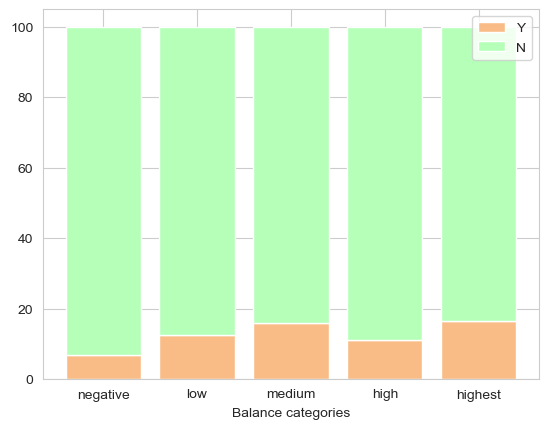

In [126]:
plot_percentage(df_bank, 'y', 'balance_cat',['negative','low','medium','high','highest'],'Balance categories')

12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


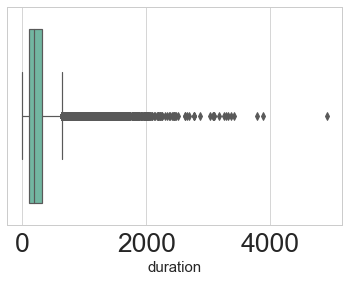

In [78]:
#View column stats
print(df_bank['duration'].describe())

#View boxplot
sns.boxplot(df_bank['duration'])

* Right skewed, a lot of outliers
#### Minimum values is 0. Lets check how many calls have duration 0

In [116]:
sorted(df_bank['duration'])[:5]

[0, 0, 0, 1, 1]

##### For now we will be keeping these 0 values
### Plotting hist for duration

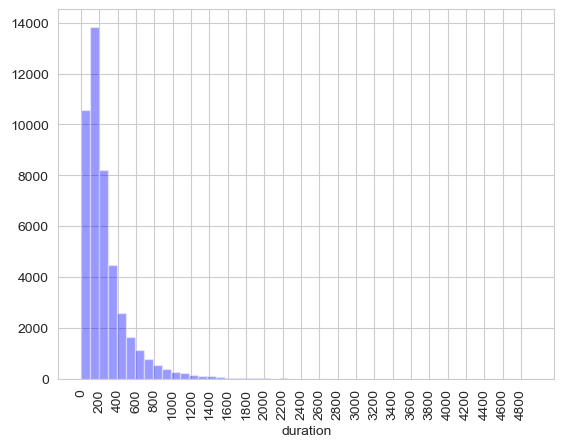

In [117]:
#set sns style
sns.reset_defaults()

#Needed for gridlines
sns.set_style("whitegrid")

#Plot hist for duration
sns.distplot(df_bank['duration'], hist=True, kde=False,color = 'blue',bins = 50)

#Distance ticks by 200 
plt.xticks(np.arange(min(df_bank['duration']), max(df_bank['duration'])+1, 200),rotation=90)

plt.show()

In [128]:
#categorize into bins of 5 minutes
df_bank['duration_cat'] = pd.cut(df_bank.duration
                                ,bins=[0,300,600,900,1200,1500,4918]
                                ,labels=['five','ten','fifteen','twenty','twentyfive','longer'])

y duration_cat     no   yes  % signed up  % passed up
0         five  31103  1831         5.56        94.44
1          ten   6859  1625        19.15        80.85
2      fifteen   1379   993        41.86        58.14
3       twenty    364   494        57.58        42.42
4   twentyfive    125   208        62.46        37.54
5       longer     89   138        60.79        39.21


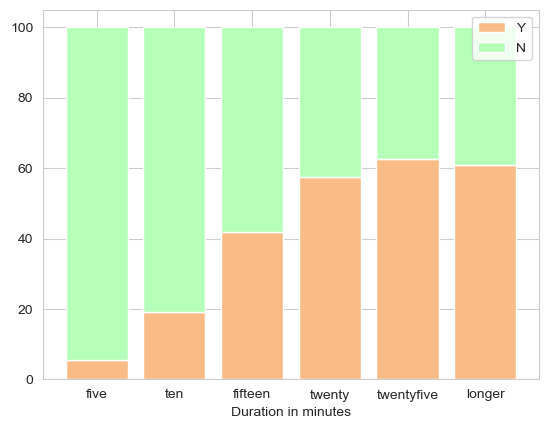

In [129]:
plot_percentage(df_bank, 'y', 'duration_cat',['five','ten','fifteen','twenty','twentyfive','longer'],'Duration in minutes')

In [130]:
#Regrouping to 15 mins intervals
df_bank['duration_15_cat'] = pd.cut(df_bank.duration
                                ,bins=[0,900,4918]
                                ,labels=['fifteen','longer'])

y duration_15_cat     no   yes  % signed up  % passed up
0         fifteen  39341  4449        10.16        89.84
1          longer    578   840        59.24        40.76


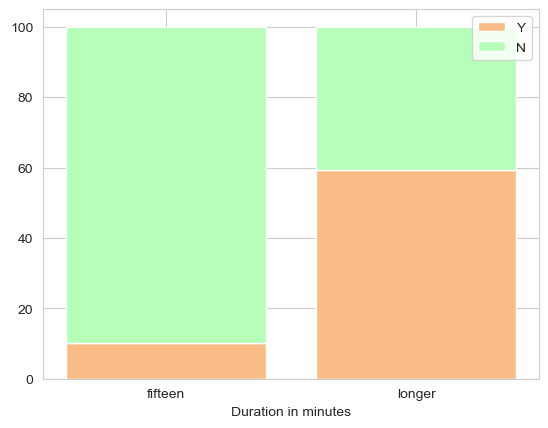

In [131]:
plot_percentage(df_bank, 'y', 'duration_15_cat',['fifteen','longer'],'Duration in minutes')

#### Any call which last more than 15 minutes predictr higher likelihood for a cutomer to signup for a term deposit

In [75]:
#View column stats
print(df_bank['campaign'].describe())

#Divide balance into bins of size 50
df_bank['campaign_cat'] = pd.cut(df_bank['campaign'], bins=50)
df_bank['campaign_cat']

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64


0        (0.938, 2.24]
1        (0.938, 2.24]
2        (0.938, 2.24]
3        (0.938, 2.24]
4        (0.938, 2.24]
             ...      
45206     (2.24, 3.48]
45207    (0.938, 2.24]
45208     (4.72, 5.96]
45209     (3.48, 4.72]
45210    (0.938, 2.24]
Name: campaign_cat, Length: 45211, dtype: category
Categories (50, interval[float64]): [(0.938, 2.24] < (2.24, 3.48] < (3.48, 4.72] < (4.72, 5.96] ... (58.04, 59.28] < (59.28, 60.52] < (60.52, 61.76] < (61.76, 63.0]]

In [73]:
#View column stats
print(df_bank['pdays'].describe())

#Divide balance into bins of size 50
df_bank['pdays_cat'] = pd.cut(df_bank['pdays'], bins=50)
df_bank['pdays_cat']

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


0        (-1.872, 16.44]
1        (-1.872, 16.44]
2        (-1.872, 16.44]
3        (-1.872, 16.44]
4        (-1.872, 16.44]
              ...       
45206    (-1.872, 16.44]
45207    (-1.872, 16.44]
45208    (173.4, 190.84]
45209    (-1.872, 16.44]
45210    (173.4, 190.84]
Name: pdays_cat, Length: 45211, dtype: category
Categories (50, interval[float64]): [(-1.872, 16.44] < (16.44, 33.88] < (33.88, 51.32] < (51.32, 68.76] ... (801.24, 818.68] < (818.68, 836.12] < (836.12, 853.56] < (853.56, 871.0]]

In [76]:
#View column stats
print(df_bank['previous'].describe())

#Divide balance into bins of size 50
df_bank['previous_cat'] = pd.cut(df_bank['previous'], bins=50)
df_bank['previous_cat']

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64


0        (-0.275, 5.5]
1        (-0.275, 5.5]
2        (-0.275, 5.5]
3        (-0.275, 5.5]
4        (-0.275, 5.5]
             ...      
45206    (-0.275, 5.5]
45207    (-0.275, 5.5]
45208    (-0.275, 5.5]
45209    (-0.275, 5.5]
45210      (5.5, 11.0]
Name: previous_cat, Length: 45211, dtype: category
Categories (50, interval[float64]): [(-0.275, 5.5] < (5.5, 11.0] < (11.0, 16.5] < (16.5, 22.0] ... (253.0, 258.5] < (258.5, 264.0] < (264.0, 269.5] < (269.5, 275.0]]

### Percentage of missing values

In [60]:
#Make a list of all values that mean null or missing or not available, any data that is not meaningful
missing_values = ['unknown']
df_bank_new = pd.read_csv('Data\\bank-full.csv', delimiter=';',na_values = missing_values)
df_bank_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [61]:
missing=['job','contact','poutcome']
for col in df_bank.loc[:,missing]:
    null_count = df_bank_new[col].isnull().sum()  #count of null values
    total = len(df_bank_new[col])
    per = round((null_count/total)*100,2)
    print(str(col)+ ': ' +str(per)+'% unknown/null values out of '+str(total)+' entries')

job: 0.64% unknown/null values out of 45211 entries
contact: 28.8% unknown/null values out of 45211 entries
poutcome: 81.75% unknown/null values out of 45211 entries


#### Lets look at each column with missing values.
#### Lets see if poutcome is unknown wherever previous is 0
##### previous: number of contacts performed before this campaign and for this client (numeric)
##### poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

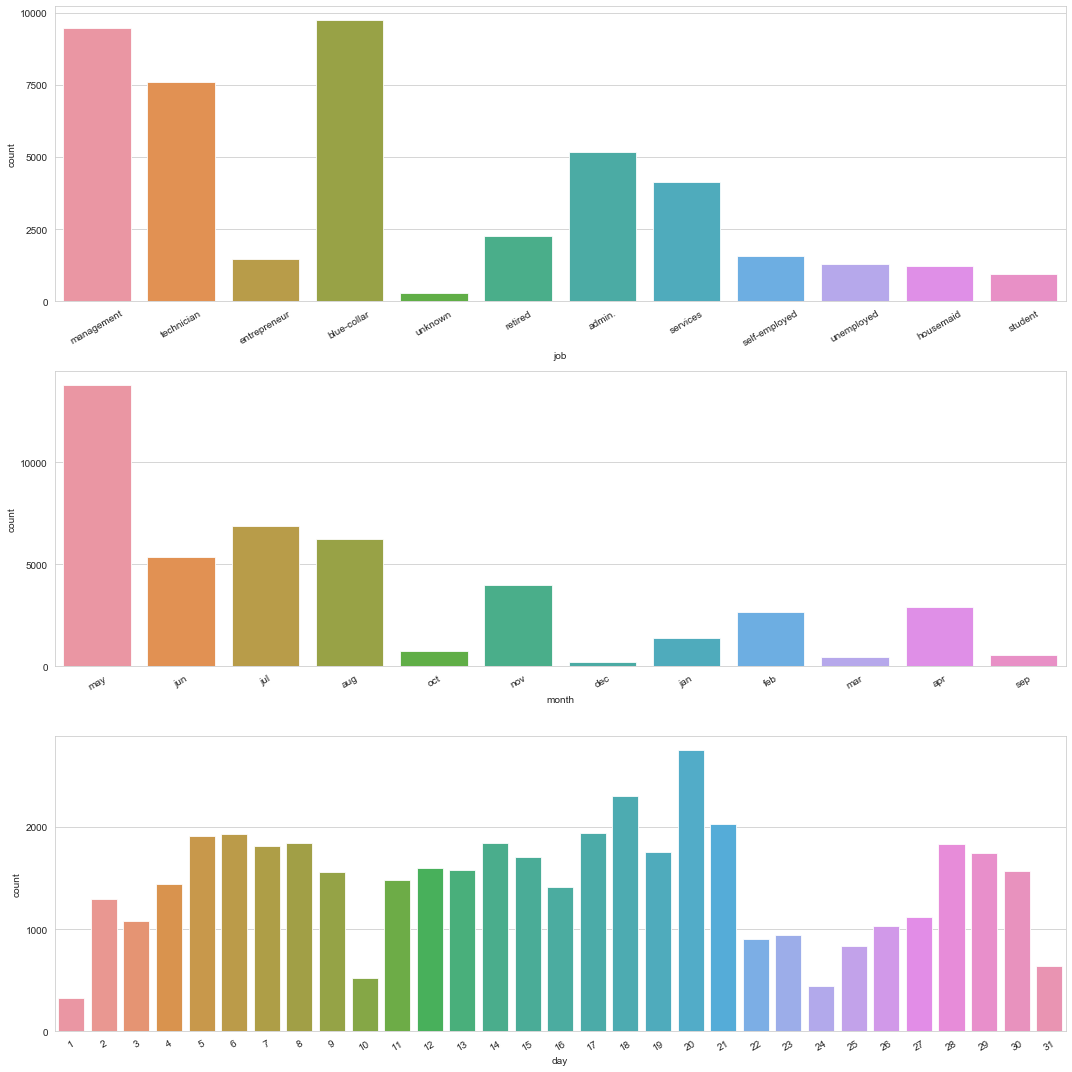

In [62]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))
#set the palette
sns.set_palette(sns.color_palette("Set2"))
sns.set_context("paper", font_scale=3, rc={"font.size":10,"axes.labelsize":15})
for variable, subplot in zip(large_cat, ax.flatten()):
    sns.countplot(df_bank[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(30)
plt.tight_layout()

### creating corelation matrix for df_bank

#### Pair plot between continous variables

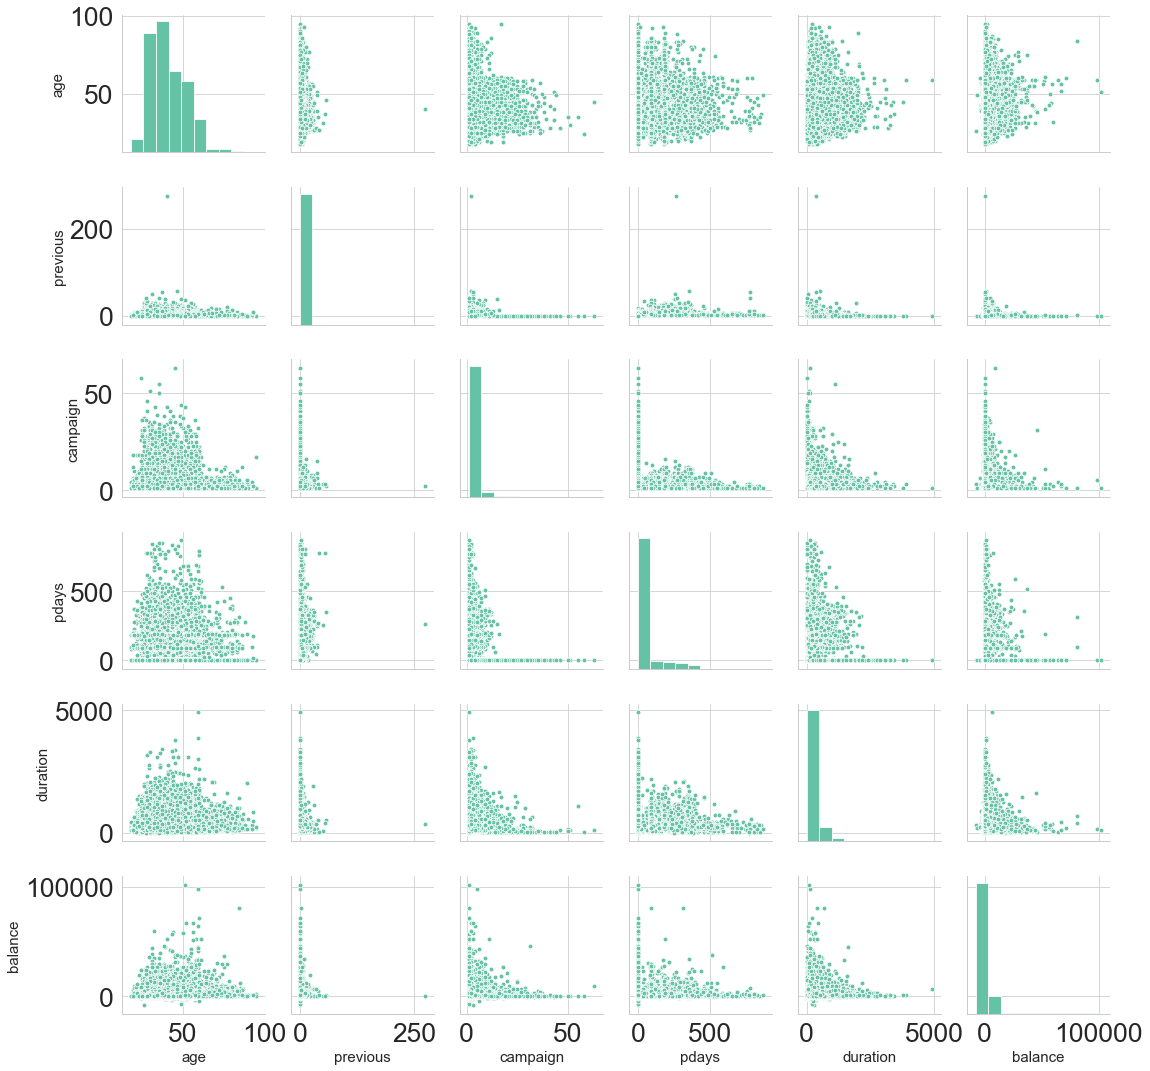

In [63]:
df = df_bank_new[continous]
df
sns.pairplot(df, kind="scatter")
plt.show()

### A person with previous loan is half as likely to subscribe to a term deposit

In [64]:
df_cross = pd.crosstab(df_bank.loan, df_bank.y)
df_cross['Percentage'] = round((df_cross['yes']/(df_cross['no'] +df_cross['yes']))*100,2)                                     
df_cross

y,no,yes,Percentage
loan,,,
no,33162,4805,12.66
yes,6760,484,6.68


(11784, 2)


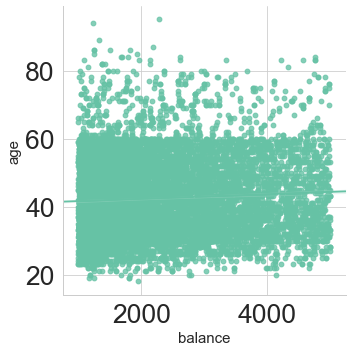

In [65]:
df = df_bank[df_bank.balance.gt(1000) & df_bank.balance.lt(5000)].loc[:,['age','balance']]
print(df.shape)
sns.lmplot(x='balance',y='age',data=df)

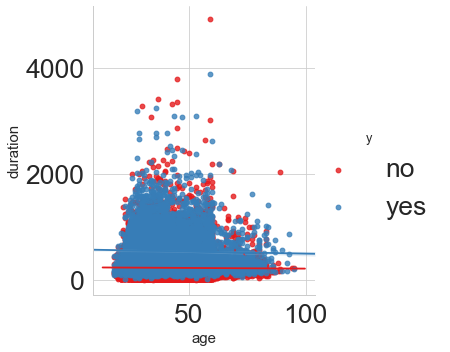

In [66]:
sns.lmplot(x='age',y='duration',data=df_bank, hue='y', palette='Set1')

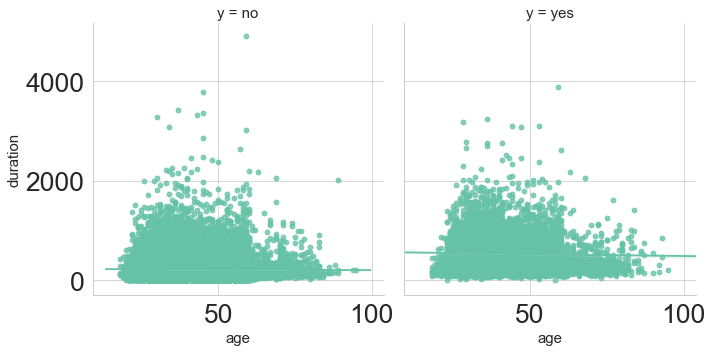

In [67]:
sns.lmplot(x='age',y='duration',data=df_bank, col='y')

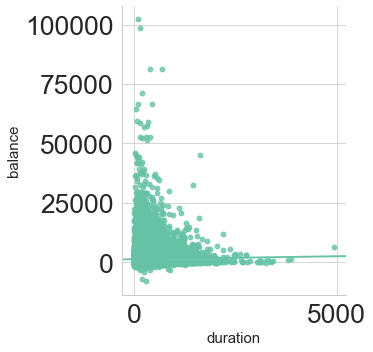

In [68]:
sns.lmplot(x='duration',y='balance',data=df_bank)

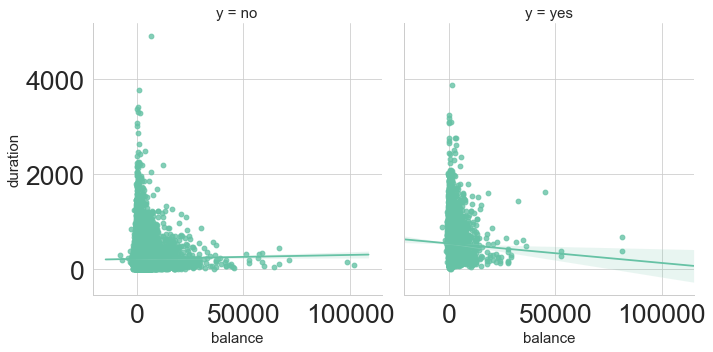

In [69]:
#duration: last contact duration, in seconds (numeric)
sns.lmplot(x='balance',y='duration',data=df_bank, col='y')

#### Highduration of the calls genrally coincide with low balance

(351, 3)


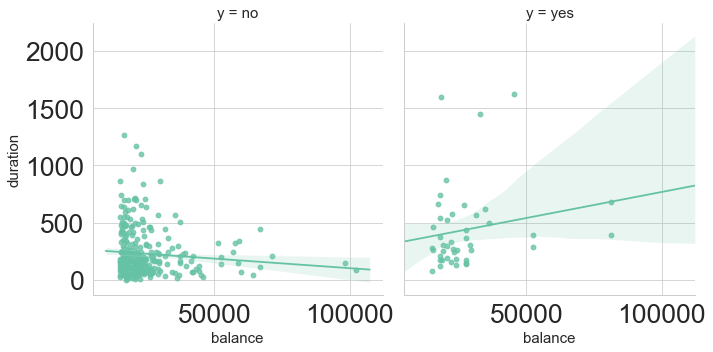

In [70]:
df = df_bank[df_bank.balance.gt(15000)].loc[:,['duration','balance','y']]
print(df.shape)
sns.lmplot(x='balance',y='duration',data=df, col='y')

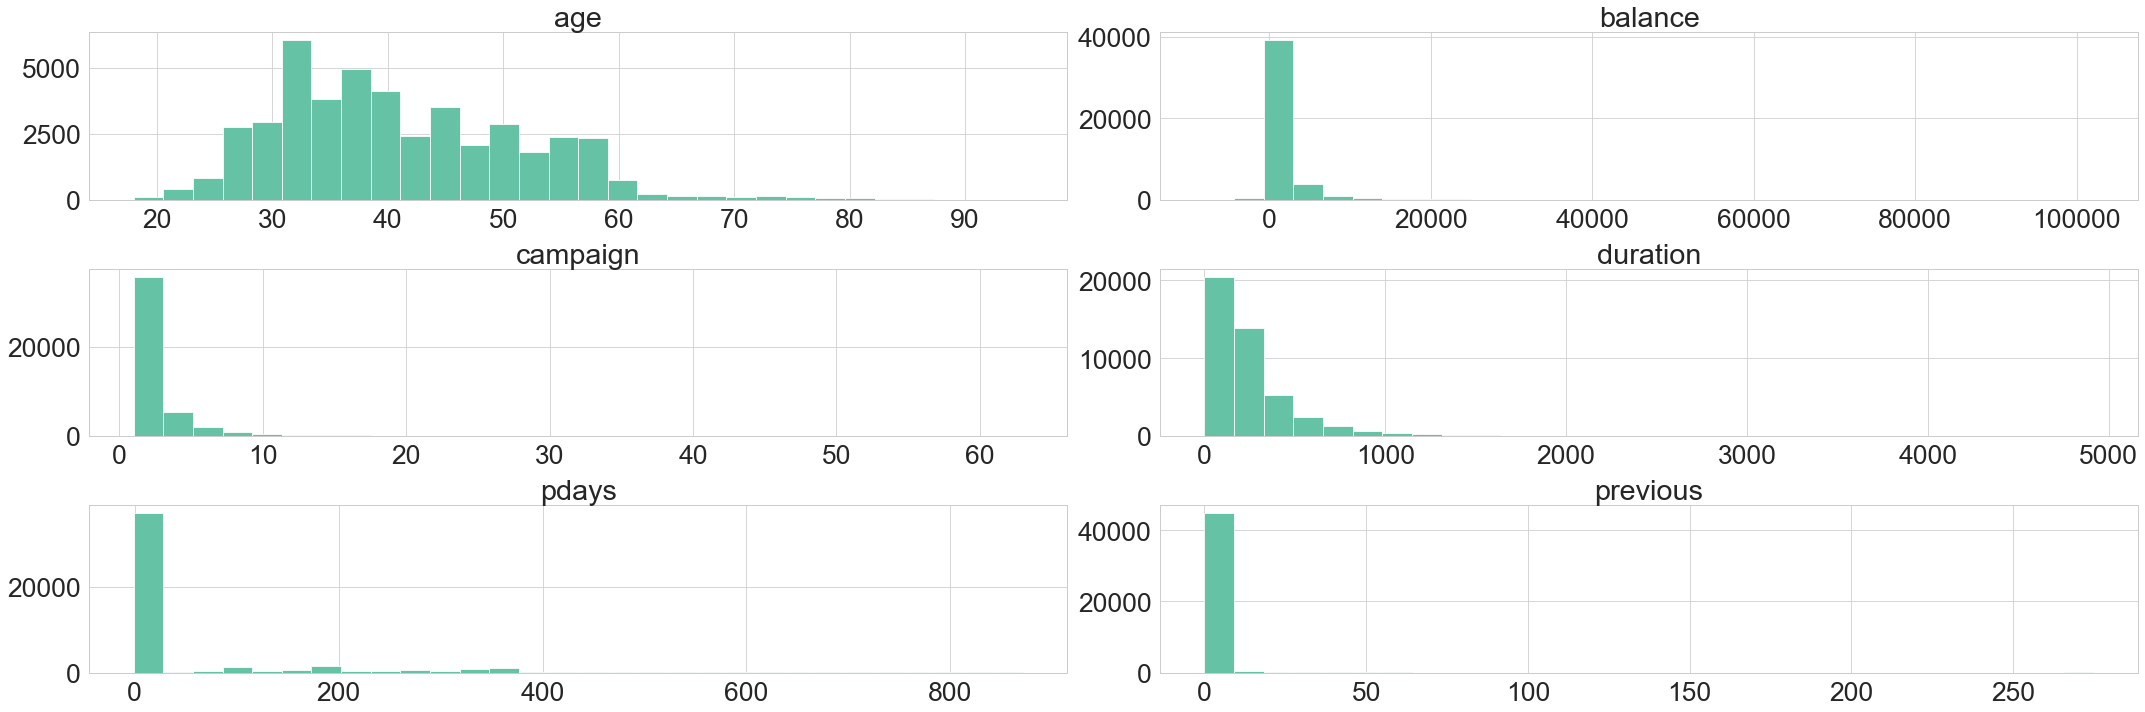

In [71]:
df_bank[continous].hist(bins=30, figsize=(30, 10));
plt.tight_layout()
plt.savefig(plot_images+'continous_distribution.png')

In [72]:
sns.catplot(x="sex", y='y', hue="class", kind="bar", data=titanic);

NameError: name 'titanic' is not defined

In [ ]:
df_bank.corr()